# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-Svpk0lXb-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 65680.99 examples/s]

Filter (num_proc=6):  26%|██▋       | 29687/112120 [00:00<00:01, 64615.60 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 116416.38 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 135548.67 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 127370.95 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 77053.11 examples/s]

Filter (num_proc=6):  33%|███▎      | 36687/112120 [00:00<00:00, 92314.11 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 134192.85 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 140772.67 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 149492.08 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.08 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.17 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.32 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.55 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.76 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.03 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.90 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.69 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.69 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.86 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.59 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.00 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.64 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.63 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.06 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.84 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.42 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.92 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.46 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.32 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.01 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.38 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 40.24 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 44.31 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 46.83 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 46.03 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.51 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.29 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.23 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.48 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 35.43 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.17 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.41 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.93 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 41.29 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 44.30 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 43.14 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 42.97 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.28 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.12 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.16 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.46 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.93 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.81 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.18 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.39 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.66 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.33 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.11 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.65 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.11 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.74 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.53 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.58 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.07 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.34 examples/s]

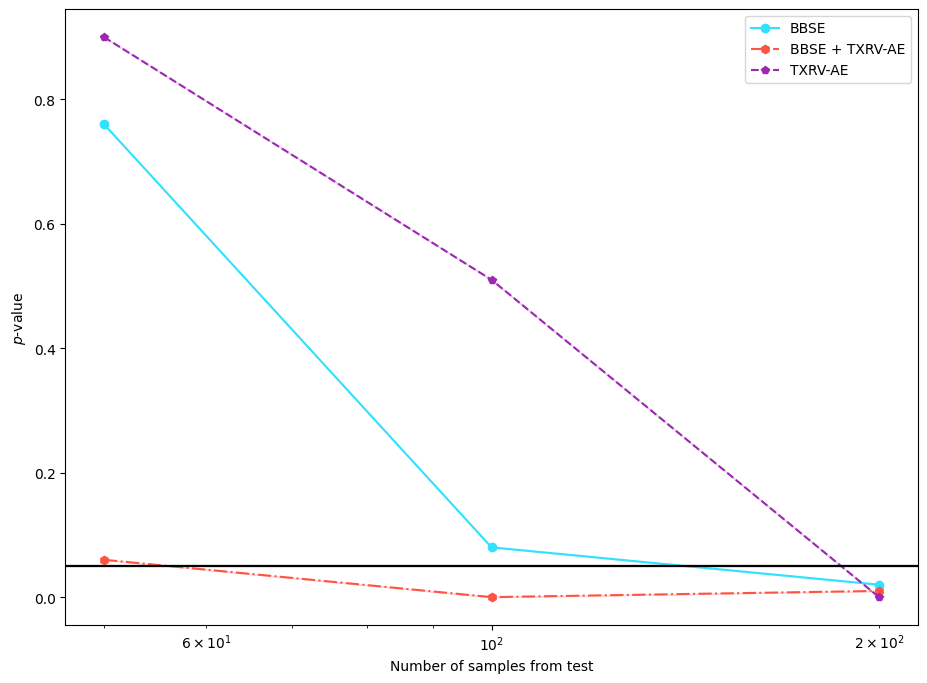

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.32 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.15 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.64 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.56 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.40 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.25 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.72 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.84 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.43 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.59 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.15 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.08 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.67 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.09 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.97 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.74 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.91 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.12 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.90 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.81 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.17 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.44 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.76 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.21 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.86 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.38 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.64 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.40 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.92 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.66 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.55 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.28 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.91 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.65 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.09 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.32 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.54 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.17 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.60 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.46 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.71 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.16 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.56 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.42 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.95 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.04 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.17 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.82 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.06 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.54 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.29 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.76 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.80 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.23 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.19 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.62 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.14 examples/s]

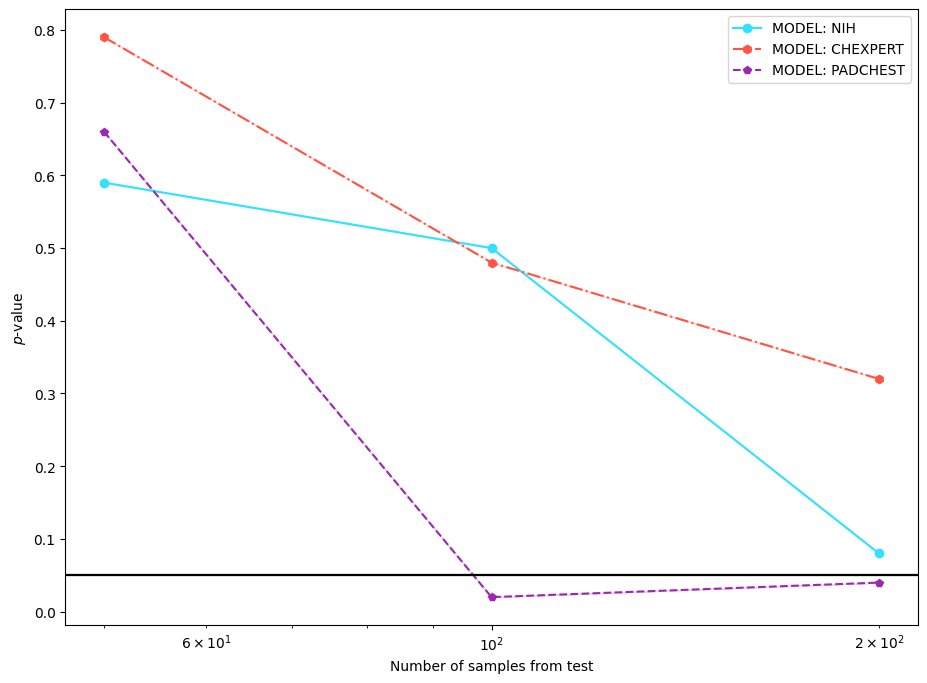

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 49991.04 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71438.65 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 86944.76 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 96896.96 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 103970.44 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 110181.98 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54773.69 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 80493.23 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 91886.78 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 101584.38 examples/s]

Filter (num_proc=6):  81%|████████  | 90748/112120 [00:01<00:00, 96721.52 examples/s] 

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 115312.44 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.09 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.62 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.21 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.56 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.46 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.11 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.70 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.65 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.50 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.74 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.53 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.60 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.62 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.40 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.07 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.13 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 49.13 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.02 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.82 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54066.80 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 76932.57 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 91911.28 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 99560.07 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 104649.37 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 109721.19 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52365.08 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72344.13 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 87480.58 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 98399.30 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 105071.32 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 111018.80 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.55 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.22 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.18 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.68 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.58 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.68 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.34 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.85 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.93 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.92 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.04 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.79 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.65 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.49 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.77 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.54 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 48.98 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.48 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.64 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52782.58 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72488.93 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 88736.70 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 98673.07 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 105601.09 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 111286.15 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51653.02 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 77691.02 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 95273.35 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 103429.20 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 107691.11 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 111898.27 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.86 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.09 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.17 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.56 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.78 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.77 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.31 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.46 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.30 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.81 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.35 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.56 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.03 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.06 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.93 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.57 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.96 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.23 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.45 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53632.75 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72894.36 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84301.13 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 96861.99 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 102880.96 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 108202.10 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51687.49 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72430.08 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 87376.50 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 97966.92 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 104005.44 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 109766.11 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.02 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.38 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.11 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.47 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.28 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.21 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.74 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.99 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.75 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.98 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.58 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.62 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.64 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.33 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.17 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.33 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.82 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.13 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.95 examples/s]

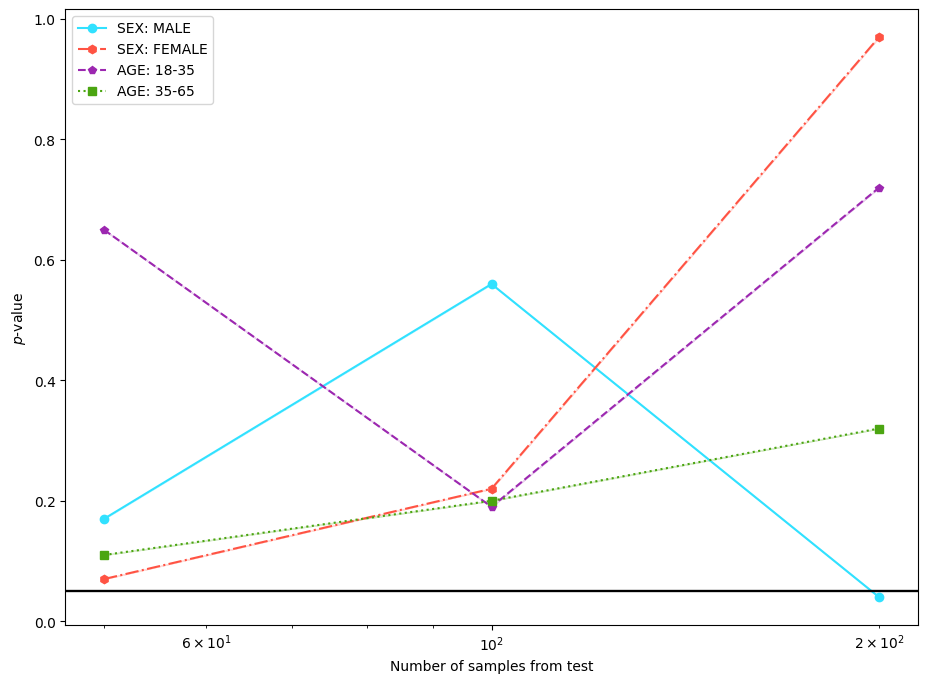

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.80 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.99 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.88 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.72 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.76 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.56 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.23 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.32 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.97 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.48 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.09 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.69 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.57 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.33 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.15 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.89 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.91 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.15 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.89 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.31 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.60 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.99 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.57 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.45 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.34 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.60 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.26 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.89 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.75 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.61 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.70 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.92 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.94 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.86 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.77 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.95 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.03 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.76 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.70 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.18 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.39 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.97 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.07 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.79 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.05 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.88 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.08 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.50 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.27 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.17 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.19 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.82 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.87 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.29 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.76 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.99 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.50 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.55 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.24 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.42 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.76 examples/s]

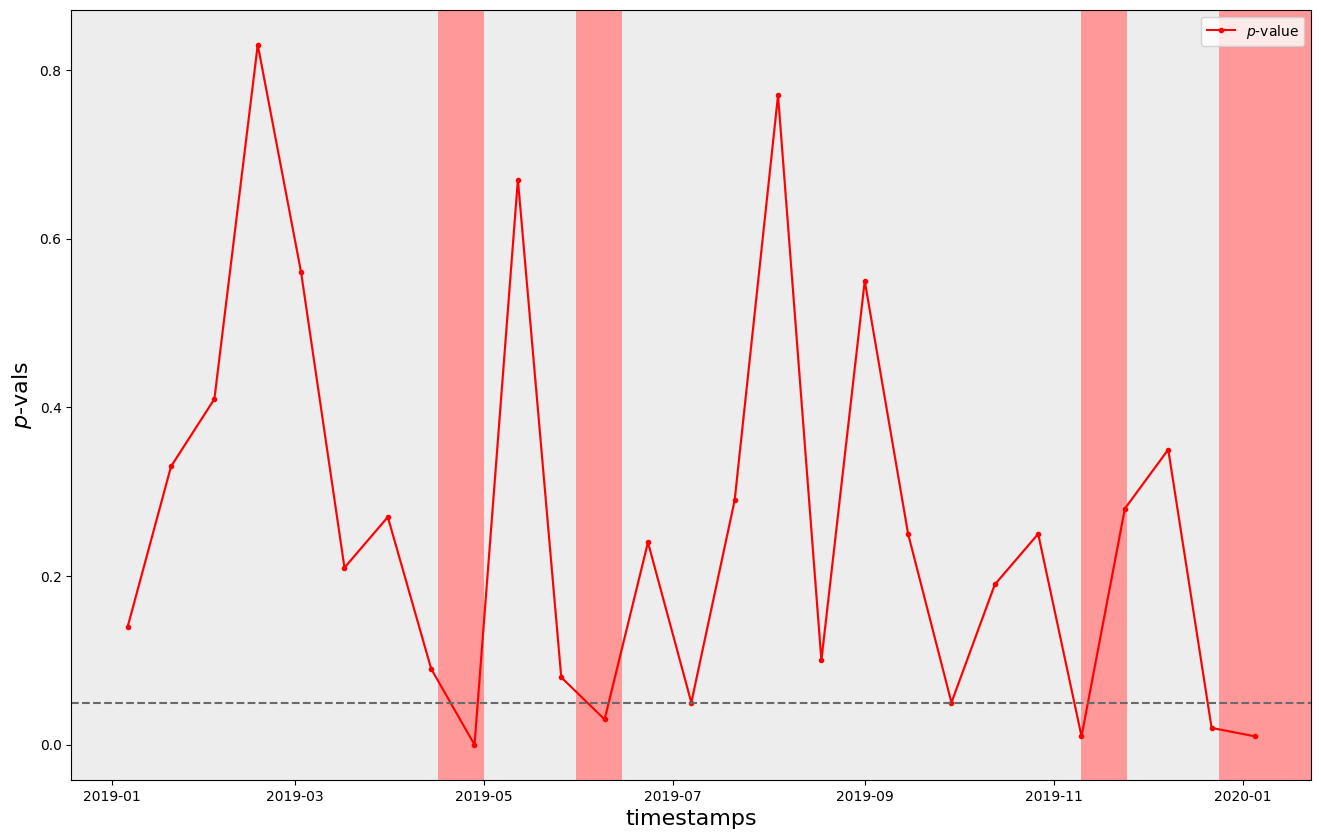

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)